# RomExchange API Sandbox

Hello, 

RomExchange API Sandbox is currently a notebook where I can tinker with the Ro mobile Exchange API (see API Docs below).
By tinker I mean:
1. Making requests and obtaining data. 
2. Using Data in time series analysis.
3. Implementing time series models e.g. SarimaX

The data coveted is the historical market value of items in the game.

API Docs : https://jessicayeh.github.io/rom-exchange-openapi/#section/Recent-Changes

# Contents

1. **Importing Libraries**  
2. **Making requests**  
3. **Making a Dataframe**  
4. **Cleaning Data**  
5. **Exploratory Data analysis**  
5. **Time series modeling**  

## 1. Importing Libraries

In [1]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
from time import sleep

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
sns.set()


## 2. Making Requests

In [2]:
# Define URL and Headers for the get below
url = 'https://www.romexchange.com/api?item=hypnoticlog&exact=false&range=month'
 
headers = {'User-Agent': 'XY', 'Content-type': 'application/json'}

# To make a request over more periods of time will need to use the page query and set the page=2,3,4,5 etc. 
# Perhaps Automate this? Windows Task Scheduler?

In [25]:
# Make request for the data
r = requests.get(url, headers = headers)
dfglobal = pd.DataFrame(columns=['snap', 'price', 'time'])
dfglobal

,snap,price,time


In [26]:
# For loop Request with sleep timer
for i in range(4):
    r = requests.get(f'https://www.romexchange.com/api?item=hypnoticlog&exact=false&range=month&page={i}', headers = headers)
    sleep(5)
    print(r.status_code)
    print(r.text)
    sleep(2)
    j = r.json()
    dftemp = pd.DataFrame(j[0]['global']['month']['data'])
    sleep (1)
    dfglobal.append(dftemp)
    print(dfglobal)
    sleep(1)
    
    
    

200
[{"name":"Hypnotic Log","type":11,"image":null,"global_sea_diff":-27.5,"global":{"latest":814,"latest_time":"2020-01-14T08:29:12Z","month":{"data":[{"snap":false,"price":1030,"time":"2019-12-15T09:16:53Z"},{"snap":false,"price":992,"time":"2019-12-16T09:03:01Z"},{"snap":false,"price":983,"time":"2019-12-17T08:51:58Z"},{"snap":false,"price":1027,"time":"2019-12-18T09:21:53Z"},{"snap":false,"price":1029,"time":"2019-12-19T08:34:15Z"},{"snap":false,"price":1147,"time":"2019-12-20T08:34:37Z"},{"snap":false,"price":1282,"time":"2019-12-21T08:48:52Z"},{"snap":false,"price":1423,"time":"2019-12-22T08:37:20Z"},{"snap":false,"price":1792,"time":"2019-12-23T08:47:50Z"},{"snap":false,"price":2083,"time":"2019-12-24T08:49:13Z"},{"snap":false,"price":2078,"time":"2019-12-25T08:36:52Z"},{"snap":false,"price":2040,"time":"2019-12-26T08:45:24Z"},{"snap":false,"price":2063,"time":"2019-12-27T08:37:04Z"},{"snap":false,"price":1983,"time":"2019-12-28T08:38:41Z"},{"snap":false,"price":1976,"time":"201

IndexError: list index out of range

In [5]:
r.status_code

200

In [29]:
# Obtain content of request payload
print(r.text)

[{"name":"Hypnotic Log","type":11,"image":null,"global_sea_diff":-27.5,"global":{"latest":814,"latest_time":"2020-01-14T08:29:12Z","month":{"data":[{"snap":false,"price":1030,"time":"2019-12-15T09:16:53Z"},{"snap":false,"price":992,"time":"2019-12-16T09:03:01Z"},{"snap":false,"price":983,"time":"2019-12-17T08:51:58Z"},{"snap":false,"price":1027,"time":"2019-12-18T09:21:53Z"},{"snap":false,"price":1029,"time":"2019-12-19T08:34:15Z"},{"snap":false,"price":1147,"time":"2019-12-20T08:34:37Z"},{"snap":false,"price":1282,"time":"2019-12-21T08:48:52Z"},{"snap":false,"price":1423,"time":"2019-12-22T08:37:20Z"},{"snap":false,"price":1792,"time":"2019-12-23T08:47:50Z"},{"snap":false,"price":2083,"time":"2019-12-24T08:49:13Z"},{"snap":false,"price":2078,"time":"2019-12-25T08:36:52Z"},{"snap":false,"price":2040,"time":"2019-12-26T08:45:24Z"},{"snap":false,"price":2063,"time":"2019-12-27T08:37:04Z"},{"snap":false,"price":1983,"time":"2019-12-28T08:38:41Z"},{"snap":false,"price":1976,"time":"2019-12

## 3. Creating a Dataframe

In [30]:
# Jsonify the data payload
j = r.json()
type(j)

list

In [31]:
# How does the json object look as a dataframe?
dftest = pd.DataFrame.from_dict(j[0])
dftest

,name,type,image,global_sea_diff,global,sea,autocorrect_accuracy
latest,Hypnotic Log,11,None,-27.5,814,590,95.7
latest_time,Hypnotic Log,11,None,-27.5,2020-01-14T08:29:12Z,2020-01-14T11:14:47Z,95.7
month,Hypnotic Log,11,None,-27.5,"{'data': [{'snap': False, 'price': 1030, 'time...","{'data': [{'snap': False, 'price': 570, 'time'...",95.7


In [32]:
#Attempt at pivot table to get at the info in the dict
# df.pivot_table(df, values=df.global.items)
# Pivot table is not what I need here. Continue.

In [33]:
# Reference for Dataframe indexing below
j[0]

{'name': 'Hypnotic Log',
 'type': 11,
 'image': None,
 'global_sea_diff': -27.5,
 'global': {'latest': 814,
  'latest_time': '2020-01-14T08:29:12Z',
  'month': {'data': [{'snap': False,
     'price': 1030,
     'time': '2019-12-15T09:16:53Z'},
    {'snap': False, 'price': 992, 'time': '2019-12-16T09:03:01Z'},
    {'snap': False, 'price': 983, 'time': '2019-12-17T08:51:58Z'},
    {'snap': False, 'price': 1027, 'time': '2019-12-18T09:21:53Z'},
    {'snap': False, 'price': 1029, 'time': '2019-12-19T08:34:15Z'},
    {'snap': False, 'price': 1147, 'time': '2019-12-20T08:34:37Z'},
    {'snap': False, 'price': 1282, 'time': '2019-12-21T08:48:52Z'},
    {'snap': False, 'price': 1423, 'time': '2019-12-22T08:37:20Z'},
    {'snap': False, 'price': 1792, 'time': '2019-12-23T08:47:50Z'},
    {'snap': False, 'price': 2083, 'time': '2019-12-24T08:49:13Z'},
    {'snap': False, 'price': 2078, 'time': '2019-12-25T08:36:52Z'},
    {'snap': False, 'price': 2040, 'time': '2019-12-26T08:45:24Z'},
    {'snap

In [38]:
# Attempt to make a dataframe out of just the 'data', price' dict headers
dfglobal = pd.DataFrame(j[0]['global']['month']['data'])
dfglobal

dfsea = pd.DataFrame(j[0]['sea']['month']['data'])
dfsea

,snap,price,time
0,False,570,2019-12-15T12:12:24Z
1,False,534,2019-12-16T12:13:02Z
2,False,503,2019-12-17T11:38:22Z
3,False,481,2019-12-18T12:14:27Z
4,False,506,2019-12-19T11:30:38Z
5,False,528,2019-12-20T11:22:45Z
6,False,565,2019-12-21T11:33:59Z
7,False,620,2019-12-22T11:41:27Z
8,False,656,2019-12-23T11:37:14Z
9,False,696,2019-12-24T11:43:26Z


## 4. Cleaning Data

## 5. Exploratory Data Analysis

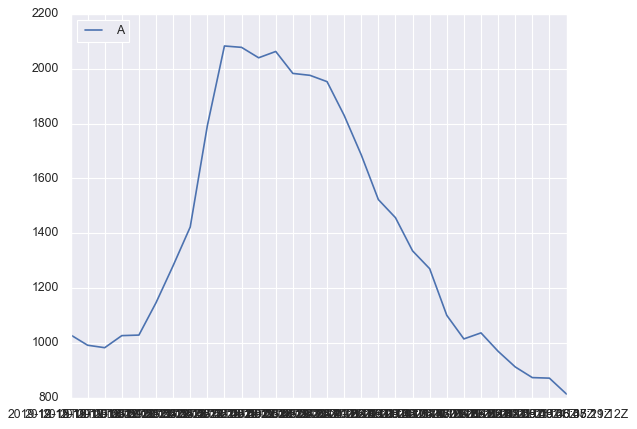

In [62]:
#plt.hist(dfglobal['price'], normed=True, alpha=0.5)

# Plot the data with Matplotlib defaults
plt.plot(dfglobal.time, dfglobal.price)
plt.legend('ABCDE', ncol=2, loc='upper left');

## 6. Time series modeling

In [21]:
# This is the Arima alternative reddit post
# https://www.reddit.com/r/datascience/comments/gro5w8/alternative_approaches_to_arima_for_time_series/